# Trabajo Práctico 2: Entrenamiento y evaluación de modelos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn_pandas
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn_pandas import DataFrameMapper
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from collections import defaultdict
import warnings

warnings.filterwarnings('ignore')

## Se debe elegir y definir una métrica de performance a utilizar para evaluar los modelos. Fundamentar la elección de la métrica.



Como nuestro dataset es multiclase y el mismo no esta balanceado, decidimos realizar el analizar con las siguientes metricas:
* Precision
* Recall
* F1

In [2]:
# Importamos el dataset.
dataset = pd.read_csv('Video_Games_Sales.csv',encoding='UTF-8')
dataset.sample(25)

,Unnamed: 0,Game,Platform,Gener,Publisher,North_America,Europe,Japan,Rest_of _World,Global,Good_Sale,Count_Games
3480,3480,Game & Watch Gallery 2,GB,Misc,Nintendo,0.76,0.30,0.12,0.04,1.22,0,665
1849,1849,Dance Central 3,X360,Misc,Microsoft Game Studios,0.57,0.18,0.00,0.06,0.81,0,178
2355,2355,Doom 64,N64,Shooter,Midway Games,0.38,0.08,0.00,0.01,0.47,0,101
4982,4982,Kirby 64: The Crystal Shards,N64,Platform,Nintendo,0.63,0.06,1.03,0.04,1.77,0,665
5930,5930,Might & Magic Heroes VII,PC,Strategy,Ubisoft,0.00,0.08,0.00,0.00,0.09,0,564
11139,11139,World Championship Poker: Howard Lederer - All In,PSP,Misc,505 Games,0.13,0.00,0.00,0.01,0.14,0,143
3442,3442,Gaku ? Ou: The Royal Seven Stars,PSP,Role-Playing,Alchemist,0.00,0.00,0.02,0.00,0.02,0,43
2441,2441,Dragon Ball Z: Idainaru Dragon Ball Densetsu,PS,Fighting,Namco Bandai Games,0.00,0.00,0.33,0.01,0.34,0,765
11072,11072,Winning Post 7 Maximum 2008,PS2,Sports,Tecmo Koei,0.00,0.00,0.02,0.00,0.02,0,249
10790,10790,Virtua Fighter CG Portrait Series Vol.4: Pai Chan,SAT,Misc,Sega,0.00,0.00,0.12,0.00,0.12,0,469


In [3]:
dataset.dtypes

Unnamed: 0          int64
Game               object
Platform           object
Gener              object
Publisher          object
North_America     float64
Europe            float64
Japan             float64
Rest_of _World    float64
Global            float64
Good_Sale           int64
Count_Games         int64
dtype: object

In [4]:
# Limpiamos un poco el dataset
dataset.drop(columns=['Unnamed: 0', 'Platform','North_America', 'Europe', 'Japan', 'Rest_of _World'],axis=1,inplace=True)
dataset.dtypes

Game            object
Gener           object
Publisher       object
Global         float64
Good_Sale        int64
Count_Games      int64
dtype: object

In [5]:
# Transformamos la variable Gener a One-Hot Encoding
dataset.Gener.value_counts()

Gener
Action          1949
Sports          1377
Misc            1304
Role-Playing    1227
Adventure       1060
Shooter          825
Racing           771
Simulation       726
Fighting         611
Platform         588
Strategy         580
Puzzle           498
Name: count, dtype: int64

In [6]:
dummies = pd.get_dummies(dataset['Gener'], drop_first = True)
dummies.head()

,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False


In [7]:
## Como se guardó en booleano (true o false), lo transformaremos a binario
dummies = dummies.astype({'Adventure': 'int32', 'Fighting': 'int32'
                         ,'Misc': 'int32', 'Platform': 'int32'
                         ,'Puzzle': 'int32', 'Racing': 'int32'
                         ,'Role-Playing': 'int32', 'Shooter': 'int32'
                         ,'Simulation': 'int32', 'Sports': 'int32'
                         ,'Strategy': 'int32'})
dummies.dtypes

Adventure       int32
Fighting        int32
Misc            int32
Platform        int32
Puzzle          int32
Racing          int32
Role-Playing    int32
Shooter         int32
Simulation      int32
Sports          int32
Strategy        int32
dtype: object

In [8]:
dummies.head()

,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [9]:
# Añadimos las variables al DataSet
dataset = pd.concat([dataset, dummies], axis = 1)

# Eliminamos la vairable original Gener
dataset = dataset.drop(columns=['Gener'])

In [10]:
dataset.sample(25)

,Game,Publisher,Global,Good_Sale,Count_Games,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
6551,NHL Hitz 20-03,Midway Games,0.47,0,101,0,0,0,0,0,0,0,0,0,1,0
5388,MLB 2006,Sony Computer Entertainment,0.40,0,617,0,0,0,0,0,0,0,0,0,1,0
8832,SnoCross Championship Racing,Ubisoft,0.93,0,564,0,0,0,0,0,1,0,0,0,0,0
8081,Romance of the Three Kingdoms XI,Tecmo Koei,0.07,0,249,0,0,0,0,0,0,0,0,0,0,1
2320,Dollar Dash,Take-Two Interactive,1.60,0,194,0,0,0,0,0,0,0,0,0,0,0
9977,The Legend of Korra (3DS),Activision,0.03,0,401,0,0,0,0,0,0,0,0,0,0,1
7800,Rayman Legends,Ubisoft,3.16,2,564,0,0,0,1,0,0,0,0,0,0,0
6902,Okami,Capcom,1.37,0,266,0,0,0,0,0,0,0,0,0,0,0
4104,High School Musical: Sing It!,Disney Interactive Studios,3.63,2,110,0,0,1,0,0,0,0,0,0,0,0
11289,Yakuza,Sega,0.91,0,469,0,0,0,0,0,0,0,0,0,0,0


In [11]:
dataset = dataset.rename(columns={'Role-Playing':'RolePlaying'})

In [12]:
dataset.sample(5)

,Game,Publisher,Global,Good_Sale,Count_Games,Adventure,Fighting,Misc,Platform,Puzzle,Racing,RolePlaying,Shooter,Simulation,Sports,Strategy
7696,RPG Tsukuru 2,ASCII Entertainment,0.31,1,19,0,0,0,0,0,0,1,0,0,0,0
5274,Lode Runner 3-D,Infogrames,0.10,0,47,0,0,0,0,0,0,0,0,0,0,0
1952,Dead Island Definitive Collection,Deep Silver,0.19,0,69,0,0,0,0,0,0,0,0,0,0,0
483,Art Academy: Lessons for Everyone,Nintendo,0.46,0,665,0,0,0,0,0,0,0,0,0,0,0
2986,Fairy Tail: Portable Guild 2,Konami Digital Entertainment,0.08,0,637,0,1,0,0,0,0,0,0,0,0,0


## Se debe aplicar alguna técnica de feature engineering para mejorar los datos de entrada a los modelos, y mostrar la comparativa de los resultados obtenidos en cada caso. Si no es posible o útil, fundamentar el motivo por el cual no se realizará.



In [13]:
mapper = DataFrameMapper([
    (['Count_Games'], [StandardScaler()]),
    (['Adventure'], [OneHotEncoder()]),
    (['Fighting'], [OneHotEncoder()]),
    (['Misc'], [OneHotEncoder()]),
    (['Platform'], [OneHotEncoder()]),
    (['Puzzle'], [OneHotEncoder()]),
    (['Racing'], [OneHotEncoder()]),
    (['RolePlaying'], [OneHotEncoder()]),
    (['Shooter'], [OneHotEncoder()]),
    (['Simulation'], [OneHotEncoder()]),
    (['Sports'], [OneHotEncoder()]),
    (['Strategy'], [OneHotEncoder()])
])

In [14]:
# 60% train, 20% test, 20% validation
train, not_train = train_test_split(dataset, test_size=0.4, random_state=42)
validation, test = train_test_split(not_train, test_size=0.5, random_state=42)

train.shape, validation.shape, test.shape

((6909, 16), (2303, 16), (2304, 16))

In [15]:
# Función para evaluar modelos con la tecnica de future engineering
def evaluar_Modelo(model, set_names=('train', 'validation'), Titulo='', show_cm=True):
    display(Titulo)
        
    final_metrics = {
        'Precision': [],
        'Recall': [],
        'F1': [], 
    }
    
    if show_cm:
        fig, axis = plt.subplots(1, len(set_names), sharey=True, figsize=(15, 3))
   
    for i, set_name in enumerate(set_names):
        assert set_name in ['train', 'validation', 'test']
        set_data = globals()[set_name] 
        y = set_data.Good_Sale
        y_pred = model.predict(set_data)
        final_metrics['Precision'].append(metrics.precision_score(y, y_pred, average='macro'))
        final_metrics['Recall'].append(metrics.recall_score(y, y_pred, average='macro'))
        final_metrics['F1'].append(metrics.f1_score(y, y_pred, average='macro'))
        
        if show_cm:
            ax = axis[i]
            sns.heatmap(metrics.confusion_matrix(y, y_pred), ax=ax, cmap='Reds', annot=True, fmt='.0f', cbar=False)

            ax.set_title(set_name)
            ax.xaxis.set_ticklabels(['MALA', 'MEDIA', 'BUENA'])
            ax.yaxis.set_ticklabels(['MALA', 'MEDIA', 'BUENA'])
            ax.set_xlabel('Predicted class')
            ax.set_ylabel('True class')
        
    display(pd.DataFrame(final_metrics, index=set_names))
    if show_cm:
        plt.tight_layout()
        plt.show()

'kNN'

,Precision,Recall,F1
train,0.555641,0.370713,0.376965
validation,0.489705,0.358637,0.355082


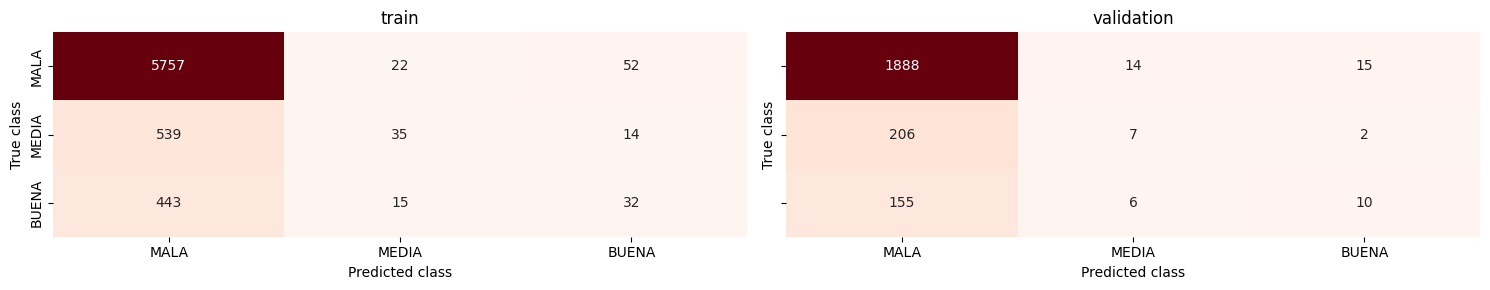

In [16]:
#Con feature engeeniring, sin hiper-parámetros.

# kNN
Modelo_KNN = Pipeline([('mapper', mapper), ('classifier', KNeighborsClassifier(n_neighbors=10))])
Modelo_KNN.fit(train, train.Good_Sale)
predictions = Modelo_KNN.predict(validation)
evaluar_Modelo(Modelo_KNN, Titulo='kNN')

'Decision Tree'

,Precision,Recall,F1
train,0.668152,0.405357,0.432502
validation,0.453659,0.357425,0.353827


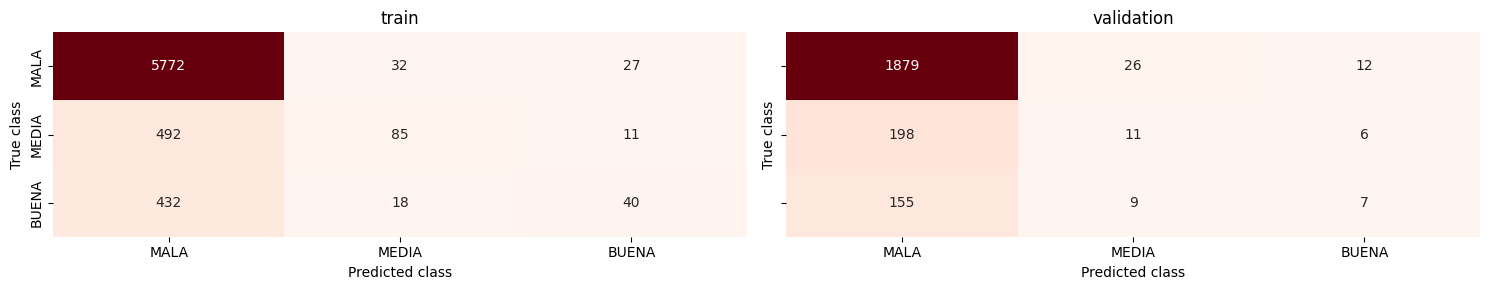

Cantidad de nodos: 1141
Profundidad máxima: 24


In [17]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
Modelo_Decision_Tree = Pipeline([('mapper', mapper), ('classifier', tree)])
Modelo_Decision_Tree.fit(train, train.Good_Sale)
evaluar_Modelo(Modelo_Decision_Tree, Titulo='Decision Tree')
print('Cantidad de nodos:', tree.tree_.node_count)
print('Profundidad máxima:', tree.tree_.max_depth)

'Gradient Boosting'

,Precision,Recall,F1
train,0.948194,0.336395,0.311342
validation,0.610894,0.335109,0.306705


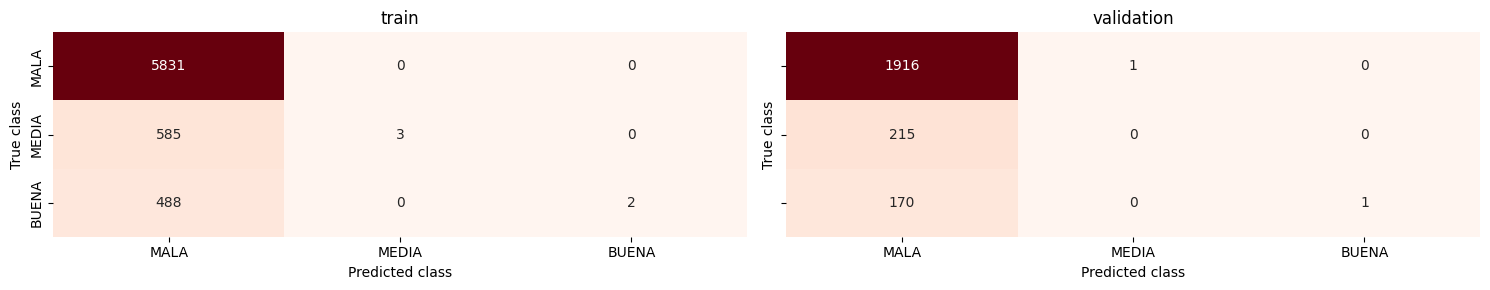

In [18]:
# Gradient Boosting
Modelo_Gradient_Boosting = Pipeline([('mapper', mapper), ('classifier', GradientBoostingClassifier(random_state=42))])
Modelo_Gradient_Boosting.fit(train, train.Good_Sale)
evaluar_Modelo(Modelo_Gradient_Boosting, Titulo='Gradient Boosting')

Con los resultados obtenidos podemos observar que la metrica Precision es la que mejor resultado nos proporciona.

A su vez, Gradient Boosting es el que nos da un valor mayor que en KNN y Decision Tree, pero tambien es el modelo que muestra una mayor diferencia entre train y validations.

## Por cada modelo, se debe entrenarlo y realizar una exploración de hiper-parámetros mediante una búsqueda en grilla. Evaluar el comportamiento de cada modelo con los hiper-parámetros que mejores resultados ofrecen. En caso de ser posible, aporte conclusiones respecto a dicha comparación.

Evaluaremos los modelos con los Hiper-parámetros: 
* Para KNN:
    * n_neighbors: 10, 20 y 30
    * weights: distance - uniform
    * p:1 (distancia de Manhattan) - 2 (distancia Euclidiana)
* Para Decision Tree
    * max_depth: 5, 7, 10 y 15
    * min_samples_split: 10
    * min_samples_leaf: 10
* Gradient Bosting
    * max_depth: 5, 7, 10 y 15
    * n_estimators: 10
    * learning_rate: 0.5
    * max_features: sqrt   

'kNN 10/uniform/1'

,Precision,Recall,F1
train,0.560271,0.371280,0.377975
validation,0.480991,0.358115,0.354583


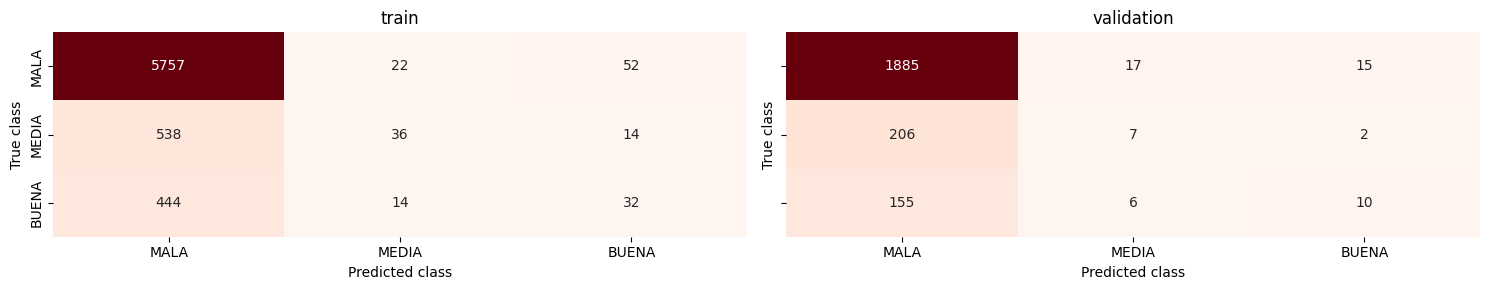

'kNN 20/uniform/1'

,Precision,Recall,F1
train,0.518398,0.342960,0.325849
validation,0.352168,0.335667,0.309976


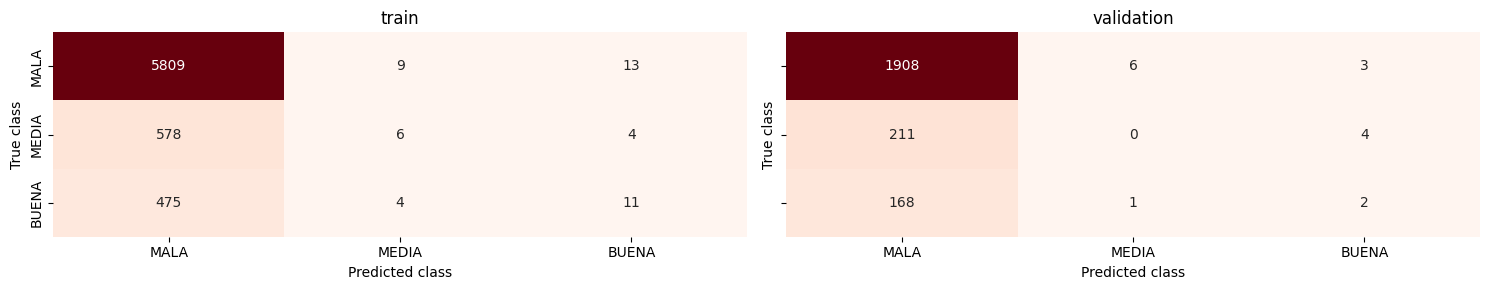

'kNN 30/uniform/1'

,Precision,Recall,F1
train,0.281324,0.333333,0.305128
validation,0.277464,0.333333,0.302844


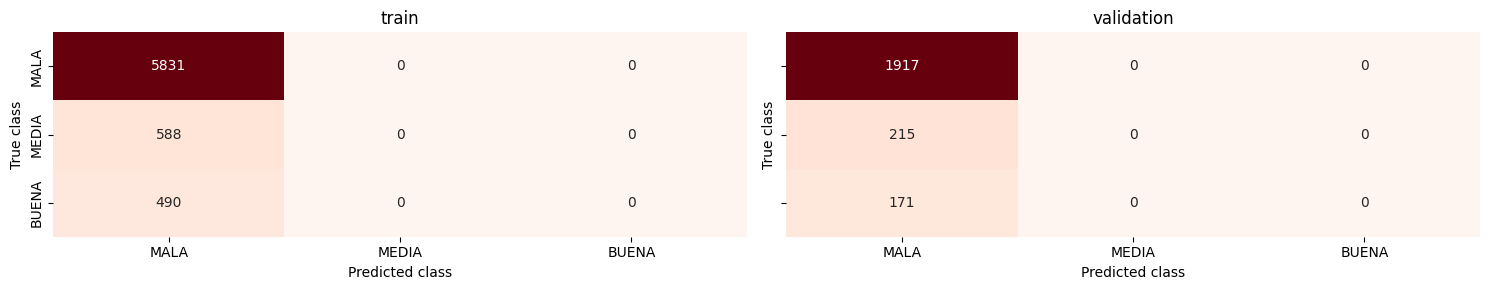

'kNN 10/distance/2'

,Precision,Recall,F1
train,0.627312,0.409651,0.438056
validation,0.462906,0.362230,0.362368


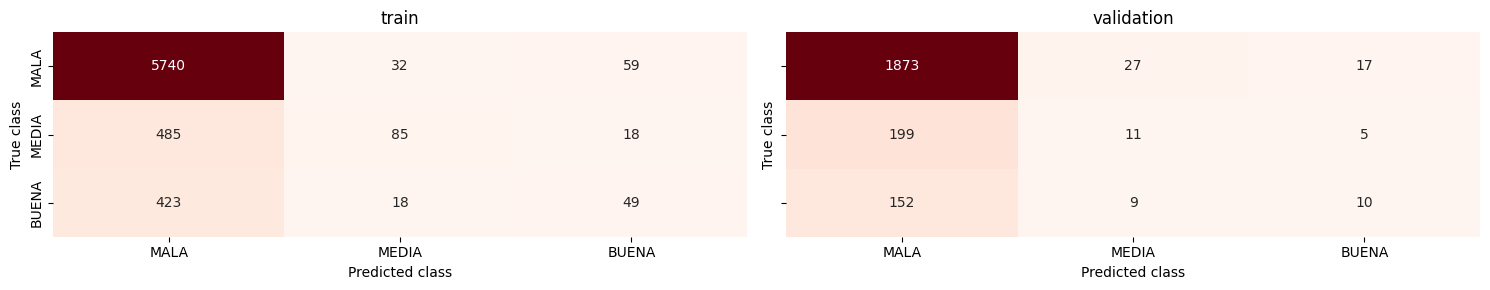

'kNN 20/distance/2'

,Precision,Recall,F1
train,0.637101,0.416848,0.448293
validation,0.467976,0.366129,0.368312


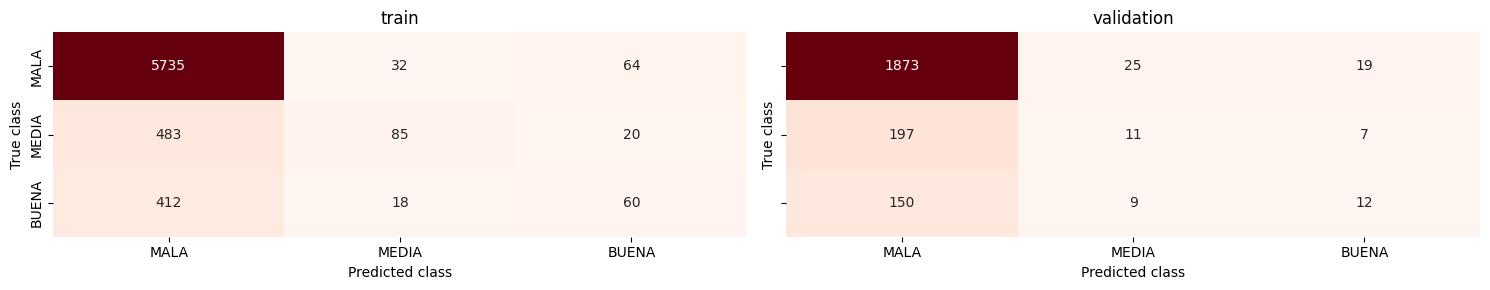

'kNN 30/distance/2'

,Precision,Recall,F1
train,0.668152,0.405357,0.432502
validation,0.457304,0.356171,0.351237


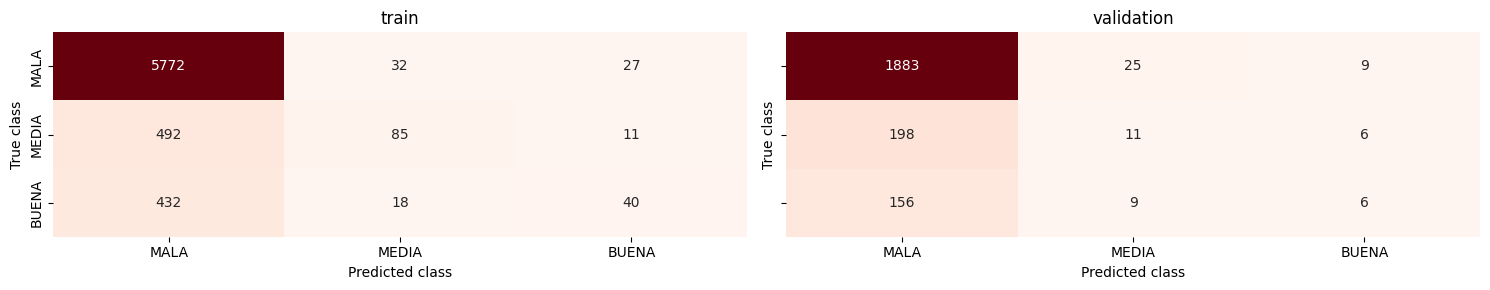

In [19]:
# kNN 10/uniform/1
Modelo_KNN10U1 = Pipeline([('mapper', mapper), 
                       ('classifier', KNeighborsClassifier(n_neighbors=10, weights='uniform', p=1))])
Modelo_KNN10U1.fit(train, train.Good_Sale)
predictions = Modelo_KNN10U1.predict(validation)
evaluar_Modelo(Modelo_KNN10U1, Titulo='kNN 10/uniform/1')

# kNN 20/uniform/1
Modelo_KNN20U1 = Pipeline([('mapper', mapper), 
                       ('classifier', KNeighborsClassifier(n_neighbors=20, weights='uniform', p=1))])
Modelo_KNN20U1.fit(train, train.Good_Sale)
predictions = Modelo_KNN20U1.predict(validation)
evaluar_Modelo(Modelo_KNN20U1, Titulo='kNN 20/uniform/1')

# kNN 30/uniform/1
Modelo_KNN30U1 = Pipeline([('mapper', mapper), 
                       ('classifier', KNeighborsClassifier(n_neighbors=30, weights='uniform', p=1))])
Modelo_KNN30U1.fit(train, train.Good_Sale)
predictions = Modelo_KNN30U1.predict(validation)
evaluar_Modelo(Modelo_KNN30U1, Titulo='kNN 30/uniform/1')

# kNN 10/distance/2
Modelo_KNN10D2 = Pipeline([('mapper', mapper), 
                       ('classifier', KNeighborsClassifier(n_neighbors=10, weights='distance', p=2))])
Modelo_KNN10D2.fit(train, train.Good_Sale)
predictions = Modelo_KNN10D2.predict(validation)
evaluar_Modelo(Modelo_KNN10D2, Titulo='kNN 10/distance/2')

# kNN 20/distance/2
Modelo_KNN20D2 = Pipeline([('mapper', mapper),
                       ('classifier', KNeighborsClassifier(n_neighbors=20, weights='distance', p=2))])
Modelo_KNN20D2.fit(train, train.Good_Sale)
predictions = Modelo_KNN20D2.predict(validation)
evaluar_Modelo(Modelo_KNN20D2, Titulo='kNN 20/distance/2')

# kNN 30/distance/2
Modelo_KNN30D2 = Pipeline([('mapper', mapper), 
                       ('classifier', KNeighborsClassifier(n_neighbors=30, weights='distance', p=2))])
Modelo_KNN30D2.fit(train, train.Good_Sale)
predictions = Modelo_KNN30D2.predict(validation)
evaluar_Modelo(Modelo_KNN30D2, Titulo='kNN 30/distance/2')

En el modelo KNN podemos notar que, con weights = uniform y p = 1, a medida que aumenta el valor de n_neighbors, disminuye el valor del resultado de validations obtenido con las 3 metricas, con Precision es en el que mas se puede observar. 

En el caso de weights = distance y p = 2, se observa lo opuesto con la metrica Precision, esta misma aumenta gradualmente de a poco. En cambio, con Recall y F1, el valor es parecido.

'Decision Tree 5'

,Precision,Recall,F1
train,0.440476,0.339622,0.318207
validation,0.410966,0.336710,0.310304


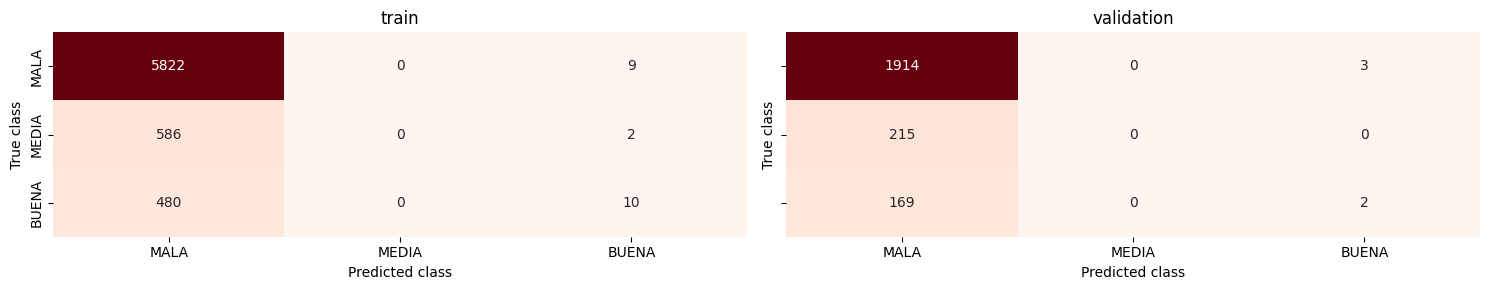

'Decision Tree 7'

,Precision,Recall,F1
train,0.579210,0.345967,0.331450
validation,0.578457,0.342738,0.322679


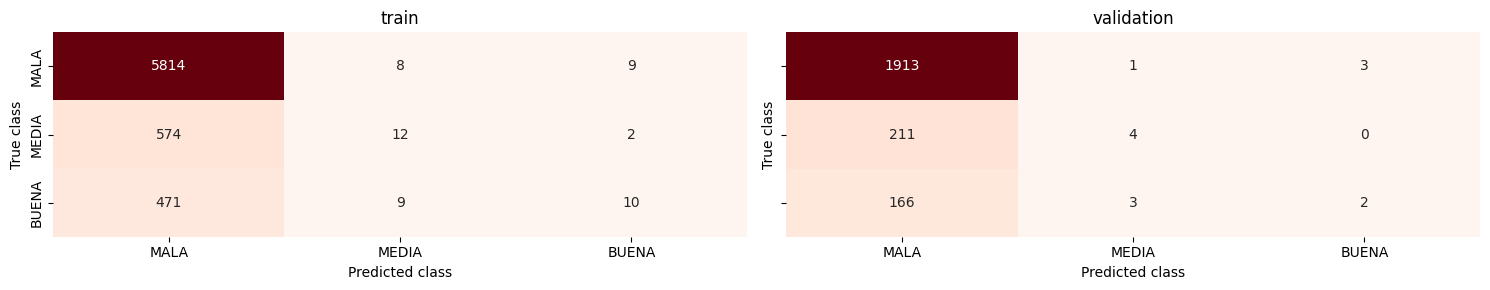

'Decision Tree 10'

,Precision,Recall,F1
train,0.586486,0.351688,0.342510
validation,0.578897,0.347041,0.331215


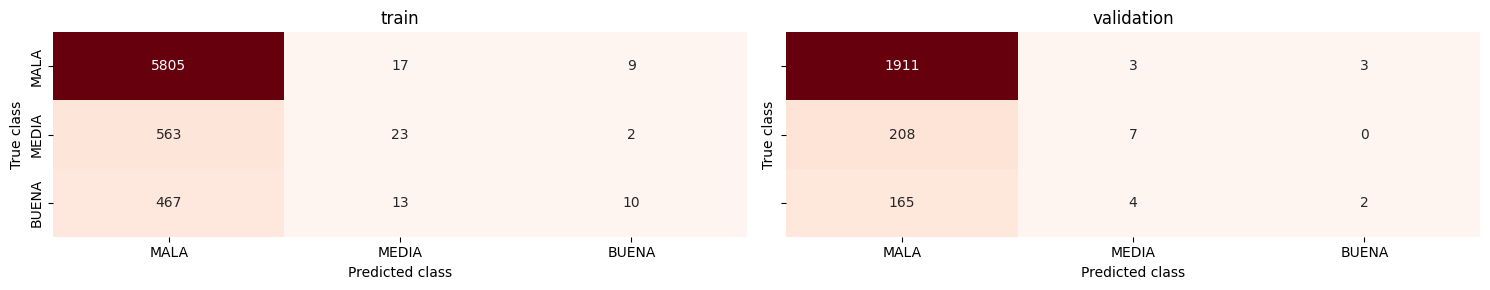

'Decision Tree 15'

,Precision,Recall,F1
train,0.586486,0.351688,0.342510
validation,0.578897,0.347041,0.331215


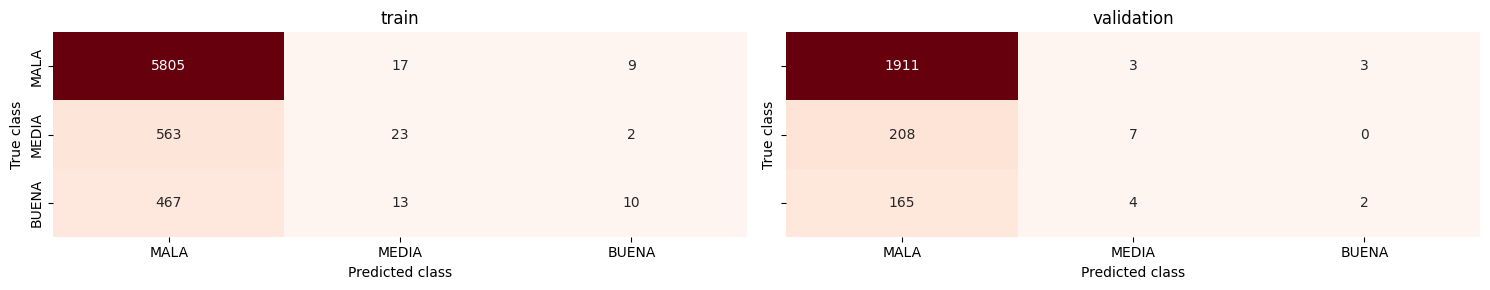

In [20]:
# Decision Tree 5
Modelo_Decision_Tree_5 = Pipeline([('mapper', mapper), 
                                   ('classifier', DecisionTreeClassifier(max_depth = 5, min_samples_split=10, min_samples_leaf=10))])
Modelo_Decision_Tree_5.fit(train, train.Good_Sale)
evaluar_Modelo(Modelo_Decision_Tree_5, Titulo='Decision Tree 5')

# Decision Tree 7
Modelo_Decision_Tree_7 = Pipeline([('mapper', mapper), 
                                    ('classifier', DecisionTreeClassifier(max_depth = 7, min_samples_split=10, min_samples_leaf=10))])
Modelo_Decision_Tree_7.fit(train, train.Good_Sale)
evaluar_Modelo(Modelo_Decision_Tree_7, Titulo='Decision Tree 7')

# Decision Tree 10
Modelo_Decision_Tree_10 = Pipeline([('mapper', mapper), 
                                    ('classifier', DecisionTreeClassifier(max_depth = 10, min_samples_split=10, min_samples_leaf=10))])
Modelo_Decision_Tree_10.fit(train, train.Good_Sale)
evaluar_Modelo(Modelo_Decision_Tree_10, Titulo='Decision Tree 10')

# Decision Tree 15
Modelo_Decision_Tree_15 = Pipeline([('mapper', mapper), 
                                    ('classifier', DecisionTreeClassifier(max_depth = 15, min_samples_split=10, min_samples_leaf=10))])
Modelo_Decision_Tree_15.fit(train, train.Good_Sale)
evaluar_Modelo(Modelo_Decision_Tree_15, Titulo='Decision Tree 15')

En el caso de Decision Tree, podemos notar que a medida que incrementamos el parametro de max_depth, los resultados al principio mejoran, pero rapidamente convergen y se estancan en un mismo resultado.

'Gradient Boosting 5'

,Precision,Recall,F1
train,0.727722,0.355719,0.349763
validation,0.472136,0.340022,0.319306


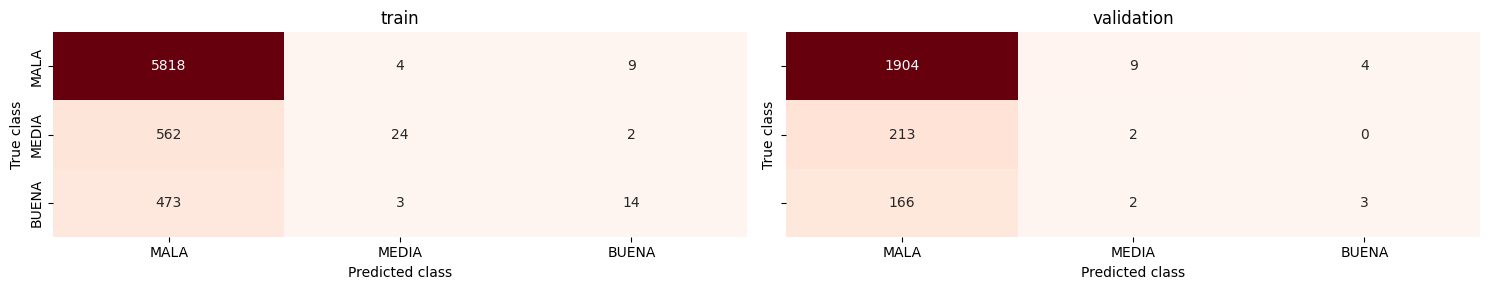

'Gradient Boosting 7'

,Precision,Recall,F1
train,0.732365,0.370171,0.376361
validation,0.480217,0.344826,0.329617


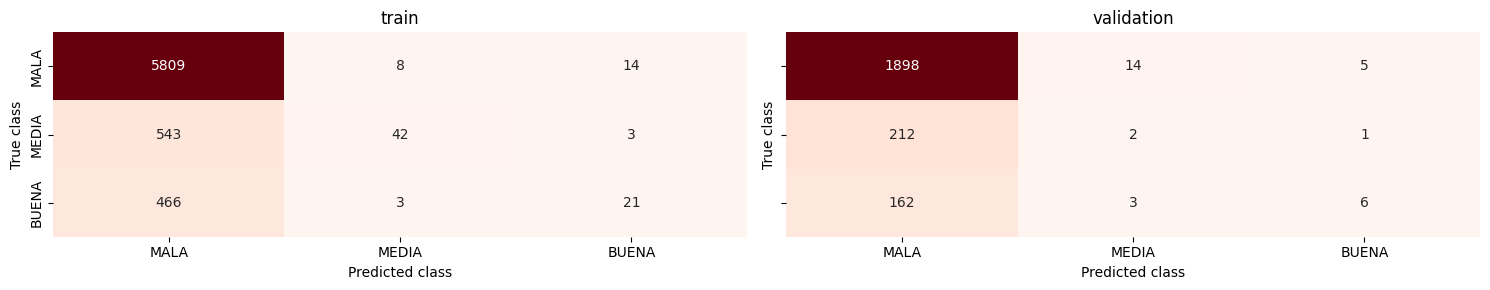

'Gradient Boosting 10'

,Precision,Recall,F1
train,0.671783,0.399522,0.424218
validation,0.478481,0.358745,0.356172


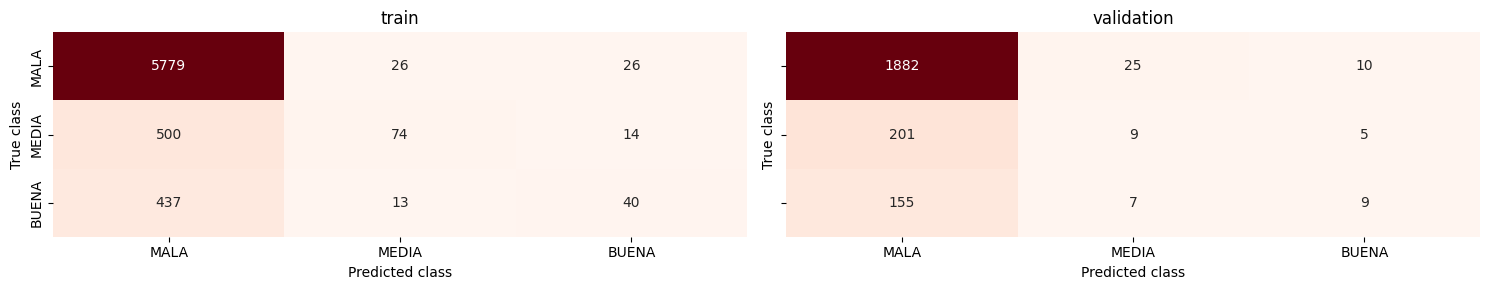

'Gradient Boosting 15'

,Precision,Recall,F1
train,0.664032,0.409718,0.438938
validation,0.469066,0.363367,0.364797


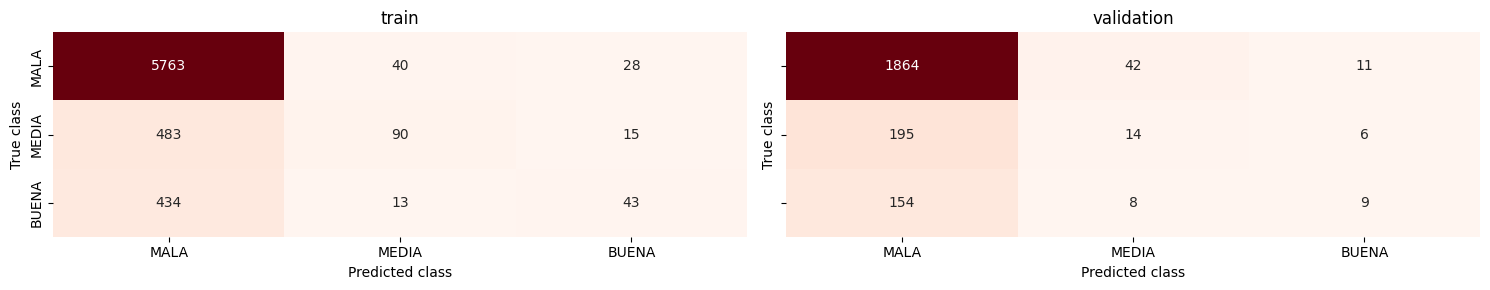

In [21]:
# Gradient Boosting 5
Modelo_Gradient_Boosting_5 = Pipeline([('mapper', mapper), 
                                        ('classifier', GradientBoostingClassifier
                                         (max_depth = 5, random_state=42, n_estimators=10, 
                                          learning_rate=0.5, max_features='sqrt'))])
Modelo_Gradient_Boosting_5.fit(train, train.Good_Sale)
evaluar_Modelo(Modelo_Gradient_Boosting_5, Titulo='Gradient Boosting 5')

# Gradient Boosting 7
Modelo_Gradient_Boosting_7 = Pipeline([('mapper', mapper), 
                                        ('classifier', GradientBoostingClassifier
                                         (max_depth = 7, random_state=42, n_estimators=10, 
                                          learning_rate=0.5, max_features='sqrt'))])
Modelo_Gradient_Boosting_7.fit(train, train.Good_Sale)
evaluar_Modelo(Modelo_Gradient_Boosting_7, Titulo='Gradient Boosting 7')

# Gradient Boosting 10
Modelo_Gradient_Boosting_10 = Pipeline([('mapper', mapper), 
                                        ('classifier', GradientBoostingClassifier
                                         (max_depth = 10, random_state=42, n_estimators=10, 
                                          learning_rate=0.5, max_features='sqrt'))])
Modelo_Gradient_Boosting_10.fit(train, train.Good_Sale)
evaluar_Modelo(Modelo_Gradient_Boosting_10, Titulo='Gradient Boosting 10')

# Gradient Boosting 15
Modelo_Gradient_Boosting_15 = Pipeline([('mapper', mapper), 
                                        ('classifier', GradientBoostingClassifier
                                         (max_depth = 15, random_state=42, n_estimators=10, 
                                          learning_rate=0.5, max_features='sqrt'))])
Modelo_Gradient_Boosting_15.fit(train, train.Good_Sale)
evaluar_Modelo(Modelo_Gradient_Boosting_15, Titulo='Gradient Boosting 15')

En Gradient Boosting nos encontramos con el caso opuesto a Decision Tree, a medida que aumenta el max_depth los resultados obtenidos disminuyen.

## Realizar experimentos que utilicen como datos de entrada representaciones intermedias de los datos (generadas por técnicas de reducción de dimensiones como PCA). Compare los resultados obtenidos contra los casos previos, interprete y proponga conclusiones.

Aplicaremos el PCA con uno de cada modelo anterior, eligiendo el que mejor resultado nos dio.

'kNN 10/uniform/1'

,Precision,Recall,F1
train,0.554975,0.372241,0.37957
validation,0.467770,0.356565,0.35176


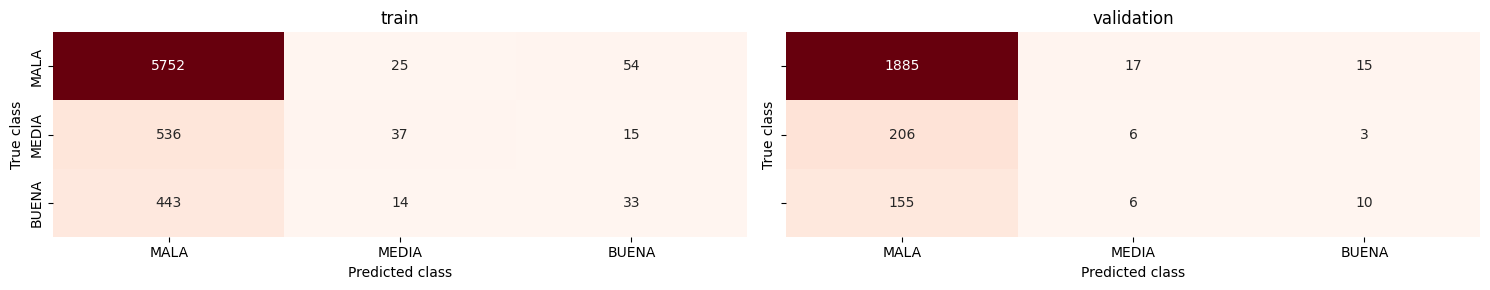

In [22]:
# kNN 10/uniform/1
Modelo_KNN10U1 = Pipeline([('mapper', mapper), ('pca', PCA()),
                       ('classifier', KNeighborsClassifier(n_neighbors=10, weights='uniform', p=1))])
Modelo_KNN10U1.fit(train, train.Good_Sale)
predictions = Modelo_KNN10U1.predict(validation)
evaluar_Modelo(Modelo_KNN10U1, Titulo='kNN 10/uniform/1')

'Decision Tree 10'

,Precision,Recall,F1
train,0.599916,0.370442,0.376164
validation,0.453289,0.348332,0.336137


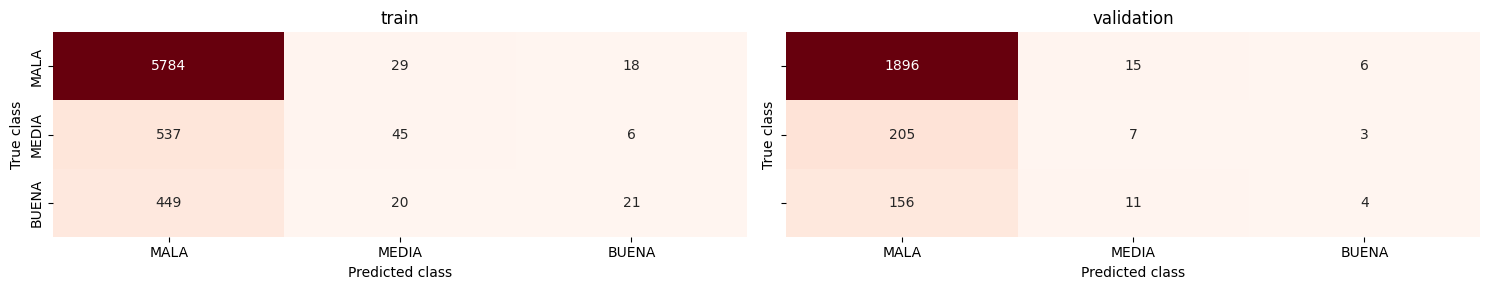

In [23]:
# Decision Tree 10
Modelo_Decision_Tree_10 = Pipeline([('mapper', mapper), ('pca', PCA()),
                                    ('classifier', DecisionTreeClassifier(max_depth = 10, min_samples_split=10, min_samples_leaf=10))])
Modelo_Decision_Tree_10.fit(train, train.Good_Sale)
evaluar_Modelo(Modelo_Decision_Tree_10, Titulo='Decision Tree 10')

'Gradient Boosting 7'

,Precision,Recall,F1
train,0.674220,0.390625,0.410229
validation,0.472667,0.356063,0.350694


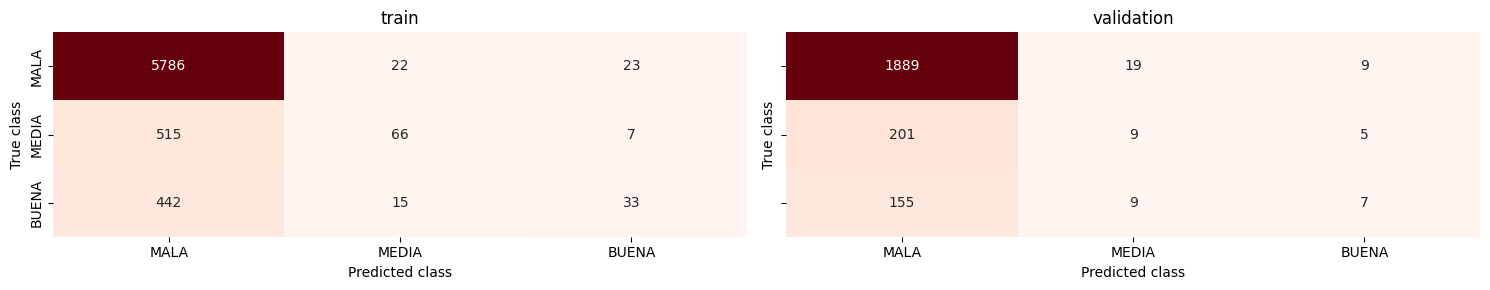

In [24]:
# Gradient Boosting 7
Modelo_Gradient_Boosting_7 = Pipeline([('mapper', mapper), ('pca', PCA()),
                                        ('classifier', GradientBoostingClassifier
                                         (max_depth = 7, random_state=42, n_estimators=10, 
                                          learning_rate=0.5, max_features='sqrt'))])
Modelo_Gradient_Boosting_7.fit(train, train.Good_Sale)
evaluar_Modelo(Modelo_Gradient_Boosting_7, Titulo='Gradient Boosting 7')

Al utilizar PCA en el metodo KNN, el resultado obtenido disminuye levemente.

En el caso de Decision Tree, se observa una leve mejora en train pero una gran diferencia negativa en el resultado obtenido con validations.

Y por ultimo, con Gradient Boosting vemos que disminuyo el resultado de train pero se mantuvo el mismo obtenido en validations.



## Determinar el valor final de la métrica que podría ser informado al cliente, utilizando técnicas que permitan obtener un valor lo más realista posible. Fundamentar y considerar no solo el rendimiento del modelo en su elección, sino también cuestiones como interpretabilidad, tiempos de entrenamiento, etc.

'Decision Tree 10'

,Precision,Recall,F1
train,0.599916,0.370442,0.376164
validation,0.453289,0.348332,0.336137


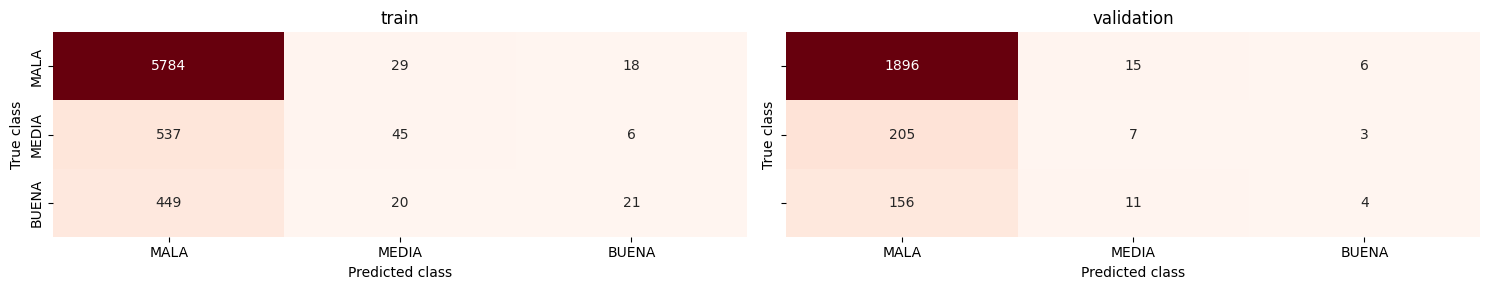

In [25]:
# Decision Tree 10
Modelo_Decision_Tree_10 = Pipeline([('mapper', mapper), ('pca', PCA()),
                                    ('classifier', DecisionTreeClassifier(max_depth = 10, min_samples_split=10, min_samples_leaf=10))])
Modelo_Decision_Tree_10.fit(train, train.Good_Sale)
evaluar_Modelo(Modelo_Decision_Tree_10, Titulo='Decision Tree 10')

''

,Precision,Recall,F1
train,0.599916,0.370442,0.376164
validation,0.453289,0.348332,0.336137
test,0.511942,0.367537,0.373443


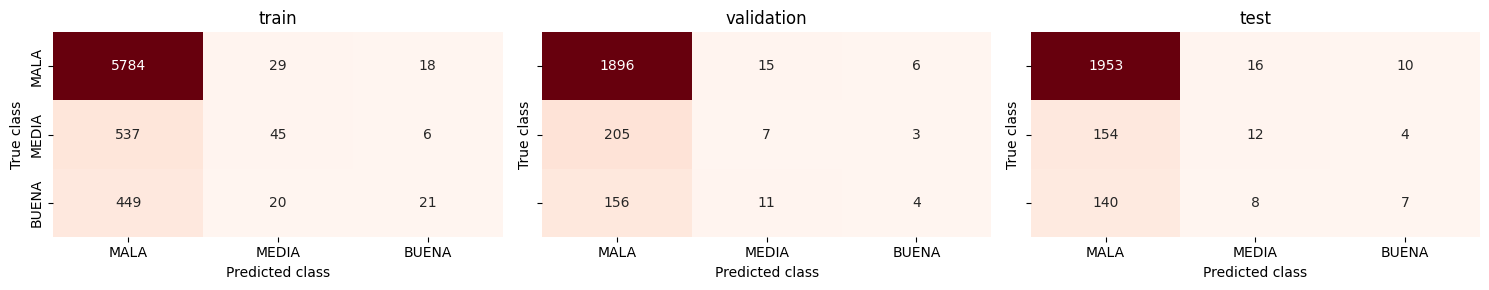

In [26]:
evaluar_Modelo(Modelo_Decision_Tree_10, set_names=('train', 'validation', 'test'), show_cm=True)


El modelo que utilizaremos para informarle al cliente sera Decision Tree con max_depth 10, con reduccion de dimensionalidad (PCA) y con la metrica Precision.

Este modelo fue elegido por tener un tiempo de respuesta menor que los demas y por ser el mas preciso al utilizar PCA.

El valor final que informaremos sera de 51,19%, esto quiere decir que aproximadamente la mitad de las predicciones son correctas, a la hora de predecir si un videojuego tuvo una buena, media o mala venta.

### VARIABLES MAS IMPORTANTES PARA EL MODELO DECISION TREE 

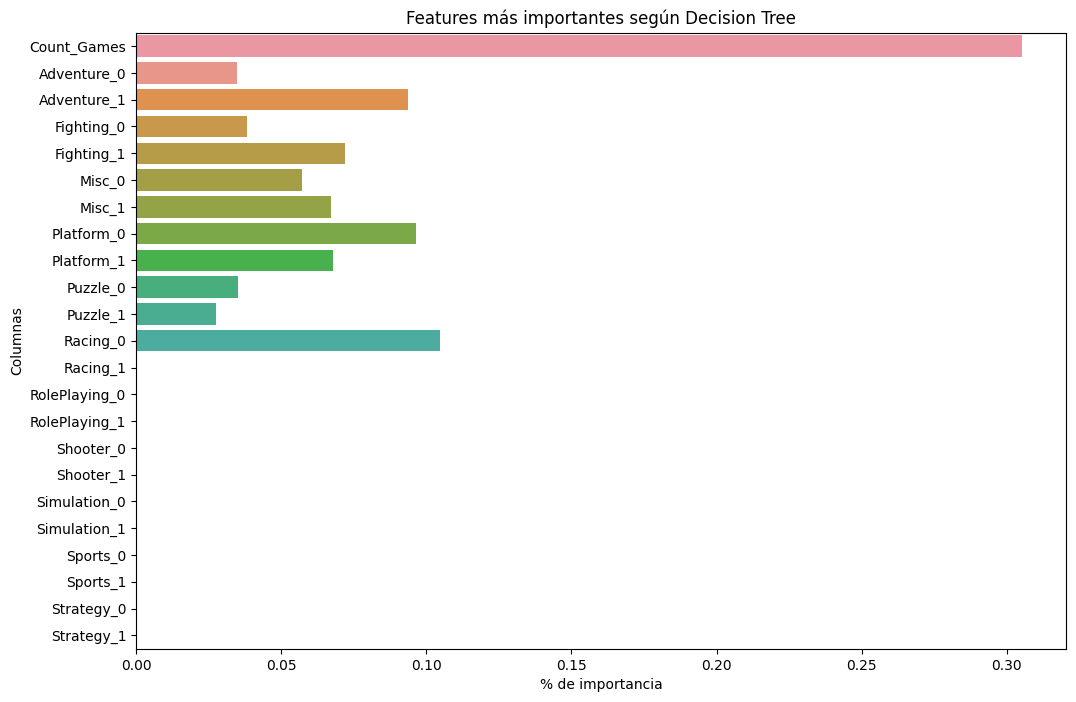

In [27]:
importancia = Modelo_Decision_Tree_10.named_steps['classifier'].feature_importances_
columnas = Modelo_Decision_Tree_10.named_steps['mapper'].transformed_names_

plt.figure(figsize=(12, 8))
sns.barplot(x=importancia, y=columnas)
plt.title('Features más importantes según Decision Tree')
plt.xlabel('% de importancia')
plt.ylabel('Columnas')
plt.show()

Como podemos observar en el grafico, la variable que mas peso tiene en nuestro dataset es Count_Games, la cual hace referencia a la cantidad de videojuegos que fueron publicados por la empresa.